# Analysis of New Coders Survey Information - David Smith
### 2016 New Coder Survey - A survey of 15,000+ people who are new to software development
https://www.kaggle.com/freecodecamp/2016-new-coder-survey-

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandasql as sql
from statistics import mean
from matplotlib import style
style.use('fivethirtyeight')

In [4]:
data = pd.read_csv('2016-FCC-New-Coders-Survey-Data.csv')

/home/david/codefellows/501/ENV/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (21,57) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# What kind of information do we have to work with?

In [5]:
data.columns

Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampFullJobAfter',
       'BootcampLoanYesNo', 'BootcampMonthsAgo', 'BootcampName',
       'BootcampPostSalary', 'BootcampRecommend', 'ChildrenNumber',
       ...
       'ResourceSoloLearn', 'ResourceStackOverflow', 'ResourceTreehouse',
       'ResourceUdacity', 'ResourceUdemy', 'ResourceW3Schools',
       'ResourceYouTube', 'SchoolDegree', 'SchoolMajor', 'StudentDebtOwe'],
      dtype='object', length=113)

In [8]:
data[40:500]

,Age,AttendedBootcamp,BootcampFinish,BootcampFullJobAfter,BootcampLoanYesNo,BootcampMonthsAgo,BootcampName,BootcampPostSalary,BootcampRecommend,ChildrenNumber,...,ResourceSoloLearn,ResourceStackOverflow,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3Schools,ResourceYouTube,SchoolDegree,SchoolMajor,StudentDebtOwe
40,24.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,high school diploma or equivalent (GED),NaN,NaN
41,34.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high school diploma or equivalent (GED),NaN,NaN
42,19.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,"some college credit, no degree",NaN,NaN
43,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,bachelor's degree,Communications,NaN
44,24.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high school diploma or equivalent (GED),NaN,NaN
45,41.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,master's degree (non-professional),English,NaN
46,47.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high school diploma or equivalent (GED),NaN,NaN
47,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,high school diploma or equivalent (GED),NaN,NaN
48,20.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high school diploma or equivalent (GED),NaN,NaN
49,20.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,high school diploma or equivalent (GED),NaN,NaN


# Let's just take the information from ppl who attended a bootcamp

In [10]:
bootcamp_data = sql.sqldf('SELECT * FROM data WHERE AttendedBootcamp=1.0')

In [12]:
bootcamp_data[0:10]

,Age,AttendedBootcamp,BootcampFinish,BootcampFullJobAfter,BootcampLoanYesNo,BootcampMonthsAgo,BootcampName,BootcampPostSalary,BootcampRecommend,ChildrenNumber,...,ResourceSoloLearn,ResourceStackOverflow,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3Schools,ResourceYouTube,SchoolDegree,SchoolMajor,StudentDebtOwe
0,32.0,1.0,1.0,0.0,0.0,8.0,Codify Academy,NaN,0.0,NaN,...,None,NaN,NaN,1.0,NaN,NaN,NaN,bachelor's degree,Biology,NaN
1,26.0,1.0,1.0,1.0,0.0,3.0,DaVinci Coders,45000.0,0.0,NaN,...,None,NaN,NaN,NaN,1.0,NaN,NaN,master's degree (non-professional),Music,80000.0
2,41.0,1.0,1.0,1.0,1.0,11.0,Coder Foundry,75000.0,1.0,3.0,...,None,NaN,NaN,NaN,1.0,NaN,NaN,"some college credit, no degree",None,8000.0
3,26.0,1.0,1.0,0.0,0.0,12.0,General Assembly,NaN,0.0,NaN,...,None,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",None,NaN
4,24.0,1.0,0.0,NaN,1.0,NaN,None,NaN,0.0,NaN,...,None,NaN,1.0,NaN,NaN,NaN,NaN,"some college credit, no degree",None,NaN
5,36.0,1.0,1.0,0.0,0.0,6.0,Thinkful,NaN,0.0,2.0,...,None,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Communications,NaN
6,25.0,1.0,1.0,0.0,1.0,1.0,Flatiron School,NaN,1.0,NaN,...,None,NaN,NaN,1.0,NaN,NaN,NaN,"professional degree (MBA, MD, JD, etc.)",Computer Science,NaN
7,52.0,1.0,1.0,1.0,0.0,24.0,General Assembly,45000.0,0.0,NaN,...,None,NaN,NaN,1.0,1.0,NaN,NaN,"some college credit, no degree",None,25000.0
8,38.0,1.0,1.0,1.0,1.0,2.0,DevMountain,50000.0,1.0,NaN,...,None,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Structural Engineering,NaN
9,35.0,1.0,1.0,1.0,1.0,8.0,The Iron Yard,60000.0,1.0,NaN,...,None,NaN,NaN,1.0,NaN,NaN,NaN,bachelor's degree,Public Administration,15000.0


## What proportion who attended a bootcamp actually completed the program?

In [13]:
successfully_completed = len(sql.sqldf('SELECT * FROM bootcamp_data WHERE BootcampFinish=1.0')) / len(bootcamp_data)

In [14]:
successfully_completed

0.6747114375655824

# How many bootcamps are in this dataset?

In [25]:
len(sql.sqldf('SELECT DISTINCT BootcampName FROM bootcamp_data'))

129

# How about the most popular bootcamps in this survey?

In [42]:
sql.sqldf('SELECT BootcampName, COUNT(*) AS `num attended` FROM bootcamp_data WHERE BootcampFinish=1.0 GROUP BY BootcampName ORDER BY `num attended` DESC')[:15]

,BootcampName,num attended
0,General Assembly,78
1,Dev Bootcamp,37
2,Flatiron School,33
3,The Iron Yard,33
4,None,24
5,Hack Reactor,22
6,Prime Digital Academy,21
7,App Academy,19
8,Hackbright Academy,19
9,MakerSquare,19


In [57]:
bc = sql.sqldf('SELECT BootcampName, COUNT(*) AS `num attended` FROM bootcamp_data WHERE BootcampFinish=1.0 GROUP BY BootcampName ORDER BY BootcampName')

In [58]:
num_with_jobs_after = sql.sqldf('SELECT BootcampName, COUNT(*) AS `num with job after` FROM bootcamp_data WHERE BootcampFullJobAfter=1.0 AND BootcampFinish=1.0 GROUP BY BootcampName ORDER BY BootcampName')

In [84]:
bc[:5]
# {i for i in bc['BootcampName']}


,BootcampName,num attended
0,None,24
1,10x.org.il,2
2,4Geeks Academy,3
3,AcadGild,1
4,Academia de Código,4


In [112]:
job_data_dict = {i[1]:[i[2]] for i in bc.itertuples()}

for i in num_with_jobs_after.itertuples():
    job_data_dict[i[1]].append(i[2])

for key, val in job_data_dict.items():
    if len(val) == 1:
        job_data_dict[key].append(0)

# For each school, what proportion of the students who completed the bootcamp have found a job (so far) in the survey?

In [127]:
job_list = sorted([(k, v[1]/v[0]) for k, v in job_data_dict.items()], key=lambda tup: tup[1], reverse=True)
job_list[:50]

[("Coder's Lab", 1.0),
 ('4Geeks Academy', 1.0),
 ('DigitalCrafts', 1.0),
 ('Camp Code Away', 1.0),
 ('10x.org.il', 1.0),
 ('CodeaCamp', 1.0),
 ('LEARN Academy', 1.0),
 ('Stackademy', 1.0),
 ('Orange County Code School', 1.0),
 ('CODEcamp Charleston', 1.0),
 ('Ada', 1.0),
 ('AcadGild', 1.0),
 ('Digital House', 1.0),
 ('Coder Foundry', 1.0),
 ('Zip Code Wilmington', 1.0),
 ('Metis', 1.0),
 ('Montana Code School', 1.0),
 ('Tech Academy Portland', 1.0),
 ('Big Nerd Ranch', 1.0),
 ('V School', 1.0),
 ('Starter League', 1.0),
 ('Origin Code Academy', 1.0),
 ('Omaha Code School', 1.0),
 ('Microsoft Research Data Science Summer School', 1.0),
 ('TalentBuddy', 1.0),
 ('We Got Coders', 1.0),
 ('Dev League', 1.0),
 ('Code For Progress', 1.0),
 ('Science to Data Science', 1.0),
 ('Hack Reactor', 0.95454545454545459),
 ('Software Guild', 0.88888888888888884),
 ('Turing', 0.8571428571428571),
 ('Epicodus', 0.84615384615384615),
 ('Free Code Camp is not a bootcamp - please scroll up and change answe

# Okay, neato, so let's analyze this information more deeply:
- How can we visualize this data?
- What factors contribute to successfully find a job after bootcamp?
- Which factors were the -most- predictive for finding a job among the others (quantify)?

## Which schools are mostly represented in this survey?

In [160]:
job_data_dict
list1 = [(key,val) for key,val in job_data_dict.items()]
list2 = [('Small school: < 20 students', [0])]
for item in list1:
    if item[1][0] > 19:
        list2.append(item)
    else:
        list2[0][1][0] += 1
list2

[('Small school: < 20 students', [98]),
 (None, [24, 8]),
 ('The Iron Yard', [33, 24]),
 ('General Assembly', [78, 48]),
 ('Dev Bootcamp', [37, 28]),
 ('Prime Digital Academy', [21, 9]),
 ('Hack Reactor', [22, 21]),
 ('Flatiron School', [33, 24])]

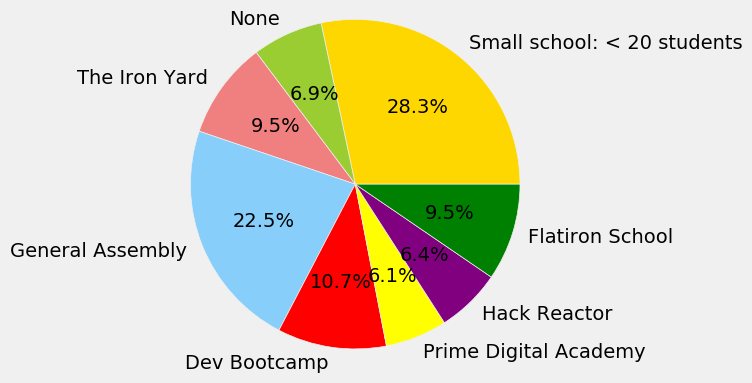

In [222]:
labels = [i[0] for i in list2]
sizes = [i[1][0] for i in list2]
 
# Plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red', 'yellow', 'purple', 'green', 'maroon']) 
plt.axis('equal')
plt.show()

In [167]:
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

/home/david/codefellows/501/ENV/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Let's select only the data we actually want to use to predict whether someone answered yes to 'BootcampFullJobAfter'

In [223]:
data.columns

Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampFullJobAfter',
       'BootcampLoanYesNo', 'BootcampMonthsAgo', 'BootcampName',
       'BootcampPostSalary', 'BootcampRecommend', 'ChildrenNumber',
       ...
       'ResourceSoloLearn', 'ResourceStackOverflow', 'ResourceTreehouse',
       'ResourceUdacity', 'ResourceUdemy', 'ResourceW3Schools',
       'ResourceYouTube', 'SchoolDegree', 'SchoolMajor', 'StudentDebtOwe'],
      dtype='object', length=113)

In [224]:
data2 = bootcamp_data[['BootcampFullJobAfter', 'CodeEventConferences', 'CodeEventGirlDev', 'CodeEventHackathons', 'CodeEventMeetup', 'CodeEventWomenCode', 'Gender', 'IsEthnicMinority', 'MonthsProgramming']]

In [235]:
data3 = data2.fillna(0)
data3.applymap(str)

,BootcampFullJobAfter,CodeEventConferences,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventWomenCode,Gender,IsEthnicMinority,MonthsProgramming
0,0.0,0.0,0.0,1.0,0.0,0.0,male,1.0,6.0
1,1.0,1.0,0.0,1.0,0.0,0.0,male,0.0,8.0
2,1.0,1.0,0.0,0.0,0.0,1.0,male,0.0,24.0
3,0.0,1.0,0.0,1.0,0.0,1.0,female,0.0,28.0
4,0.0,0.0,0.0,0.0,0.0,0.0,female,0.0,2.0
5,0.0,0.0,0.0,0.0,0.0,0.0,female,1.0,12.0
6,0.0,1.0,0.0,1.0,0.0,0.0,male,0.0,6.0
7,1.0,1.0,0.0,0.0,0.0,0.0,male,0.0,24.0
8,1.0,1.0,0.0,1.0,0.0,0.0,male,1.0,18.0
9,1.0,1.0,0.0,0.0,0.0,0.0,male,0.0,12.0


In [236]:
# S20% used to test dataset
array = data3.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = cross_validation.train_test_split(X, Y, test_size=validation_size, random_state=seed)

# Test options
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'

In [237]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

ValueError: Unknown label type: 'unknown'